In [1]:
import pandas as pd

ts="1714919255210"
df = pd.read_json(f'../neural_networks/perceptron/logs/executions/aids/output-{ts}.json')
df_predictions = pd.read_csv(f'../neural_networks/perceptron/logs/predictions/aids/predictions-{ts}.csv')

FileNotFoundError: File ../neural_networks/perceptron/logs/executions/wine/output-1714919255210.json does not exist

In [ ]:
df

,epoch,weights,accuracy_validation,mse_training,accuracy_training,mse_validation,bias
0,999,"[[-0.40310264340204605, -0.319918599895725, -0...",0.622642,0.640,0.680,0.754717,-6.532978e-18
1,998,"[[-0.40235688460662805, -0.31965538917781805, ...",0.660377,0.608,0.696,0.679245,-6.491646e-18
2,997,"[[-0.402760040852355, -0.31960521482985904, -0...",0.716981,0.544,0.728,0.566038,-6.508220e-18
3,996,"[[-0.403077480450162, -0.319491343755674, -0.0...",0.716981,0.448,0.776,0.566038,-6.439842e-18
4,995,"[[-0.40198809448480805, -0.319188249865322, -0...",0.660377,0.528,0.736,0.679245,-6.477423e-18
...,...,...,...,...,...,...,...
995,4,"[[-0.077066864185513, -0.014287636702495, -0.0...",0.339623,1.200,0.400,1.320755,7.689484e-20
996,3,"[[-0.067825341426131, -0.011383463957279, -0.0...",0.320755,1.280,0.360,1.358491,-1.778572e-20
997,2,"[[-0.054597454505315, -0.007814744508422001, -...",0.339623,1.248,0.376,1.320755,-7.875900e-20
998,1,"[[-0.039775992545691, -0.0042510108408030005, ...",0.320755,1.328,0.336,1.358491,-6.856896e-20


<Axes: xlabel='epoch'>

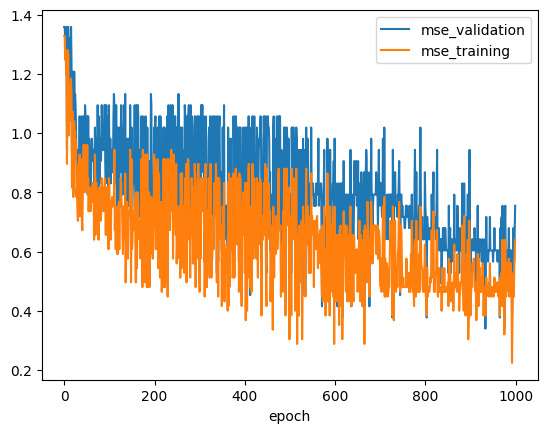

In [ ]:
# Plot a line graph comparing mse_validation, mse_test and mse_train for each epoch called iteration of 1000 first rows
df.plot(x='epoch', y=['mse_validation', 'mse_training'])

<Axes: xlabel='epoch'>

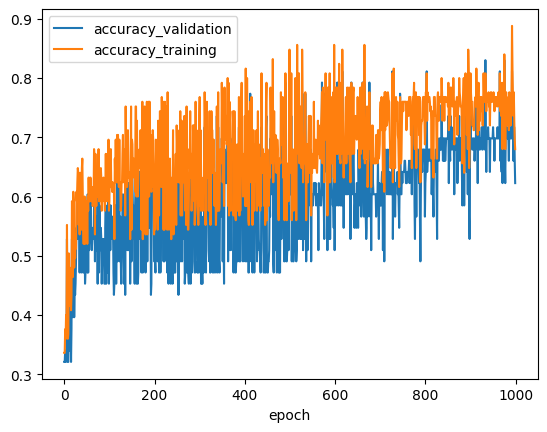

In [ ]:
# Plot a line graph comparing accuracy_validation, accuracy_test and accuracy_train for each epoch called iteration
# plot smoothed mean accuracy for each epoch - 7
df.plot(x='epoch', y=['accuracy_validation', 'accuracy_training'])


In [ ]:
df_predictions.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,expected,predicted
0,13.36,2.56,2.35,20.0,89.0,1.4,0.50,0.37,0.64,5.60,0.70,2.47,780.0,1,3
1,14.22,1.70,2.30,16.3,118.0,3.2,3.00,0.26,2.03,6.38,0.94,3.31,970.0,1,1
2,12.08,1.13,2.51,24.0,78.0,2.0,1.58,0.40,1.40,2.20,1.31,2.72,630.0,3,2
3,13.30,1.72,2.14,17.0,94.0,2.4,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1,1
4,12.70,3.55,2.36,21.5,106.0,1.7,1.20,0.17,0.84,5.00,0.78,1.29,600.0,3,3


In [ ]:
# Plot matrix of confusion with legend
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    df_predictions['expected'], 
    df_predictions['predicted'], 
    labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
)

sns.matrix = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

ValueError: At least one label specified must be in y_true

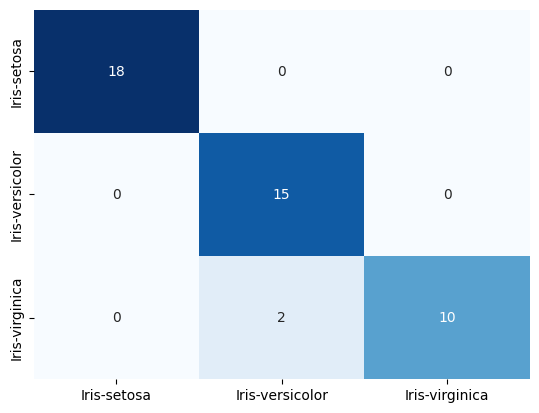

In [ ]:
# Plot matrix of confusion with legend showing which classes were better predicted
cm = confusion_matrix(
    df_predictions['expected'], 
    df_predictions['predicted'], 
    labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
)

sns.matrix = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                         xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                         yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])


In [ ]:
df_predictions.where(df_predictions['expected'] != df_predictions['predicted']).dropna()

,feature0,feature1,feature2,feature3,expected,predicted
18,6.0,2.7,5.1,1.6,Iris-virginica,Iris-versicolor
34,5.6,3.0,4.5,1.5,Iris-virginica,Iris-versicolor


In [ ]:
df.iloc[0]

epoch                                                                 99
weights                [[0.41691513859098306, 0.915692036391862, -1.1...
accuracy_validation                                             0.955556
mse_training                                                    0.057143
accuracy_training                                               0.971429
mse_validation                                                  0.088889
bias                                                                -0.0
Name: 0, dtype: object

In [ ]:
#first row
df.iloc[0]['weights']

[[0.41691513859098306,
  0.915692036391862,
  -1.181887318630435,
  -0.493278145366538],
 [0.23380903051418703,
  -0.11015072497502801,
  0.19119988117948,
  -0.105630192923805],
 [-0.464488016336829,
  -0.5836158277291611,
  1.074579448868787,
  0.8093793116477851]]

In [ ]:
df.iloc[-1]['weights']

[[0.066237573706873,
  0.105809655904833,
  -0.062487050022837005,
  0.048635577376212005],
 [0.060231712742607,
  0.051230234624584,
  0.062741991037393,
  0.07659532165209701],
 [0.05976686631886301,
  0.06488559315825901,
  0.083637070403274,
  0.08524007432913101]]

In [ ]:
df.iloc[0]['bias']

-1.3432451765466073e-17